In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash 
import folium

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,root_mean_squared_error,mean_squared_error,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [43]:
df=pd.read_csv('WineQT (2).csv')
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [44]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [45]:
df.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

In [46]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

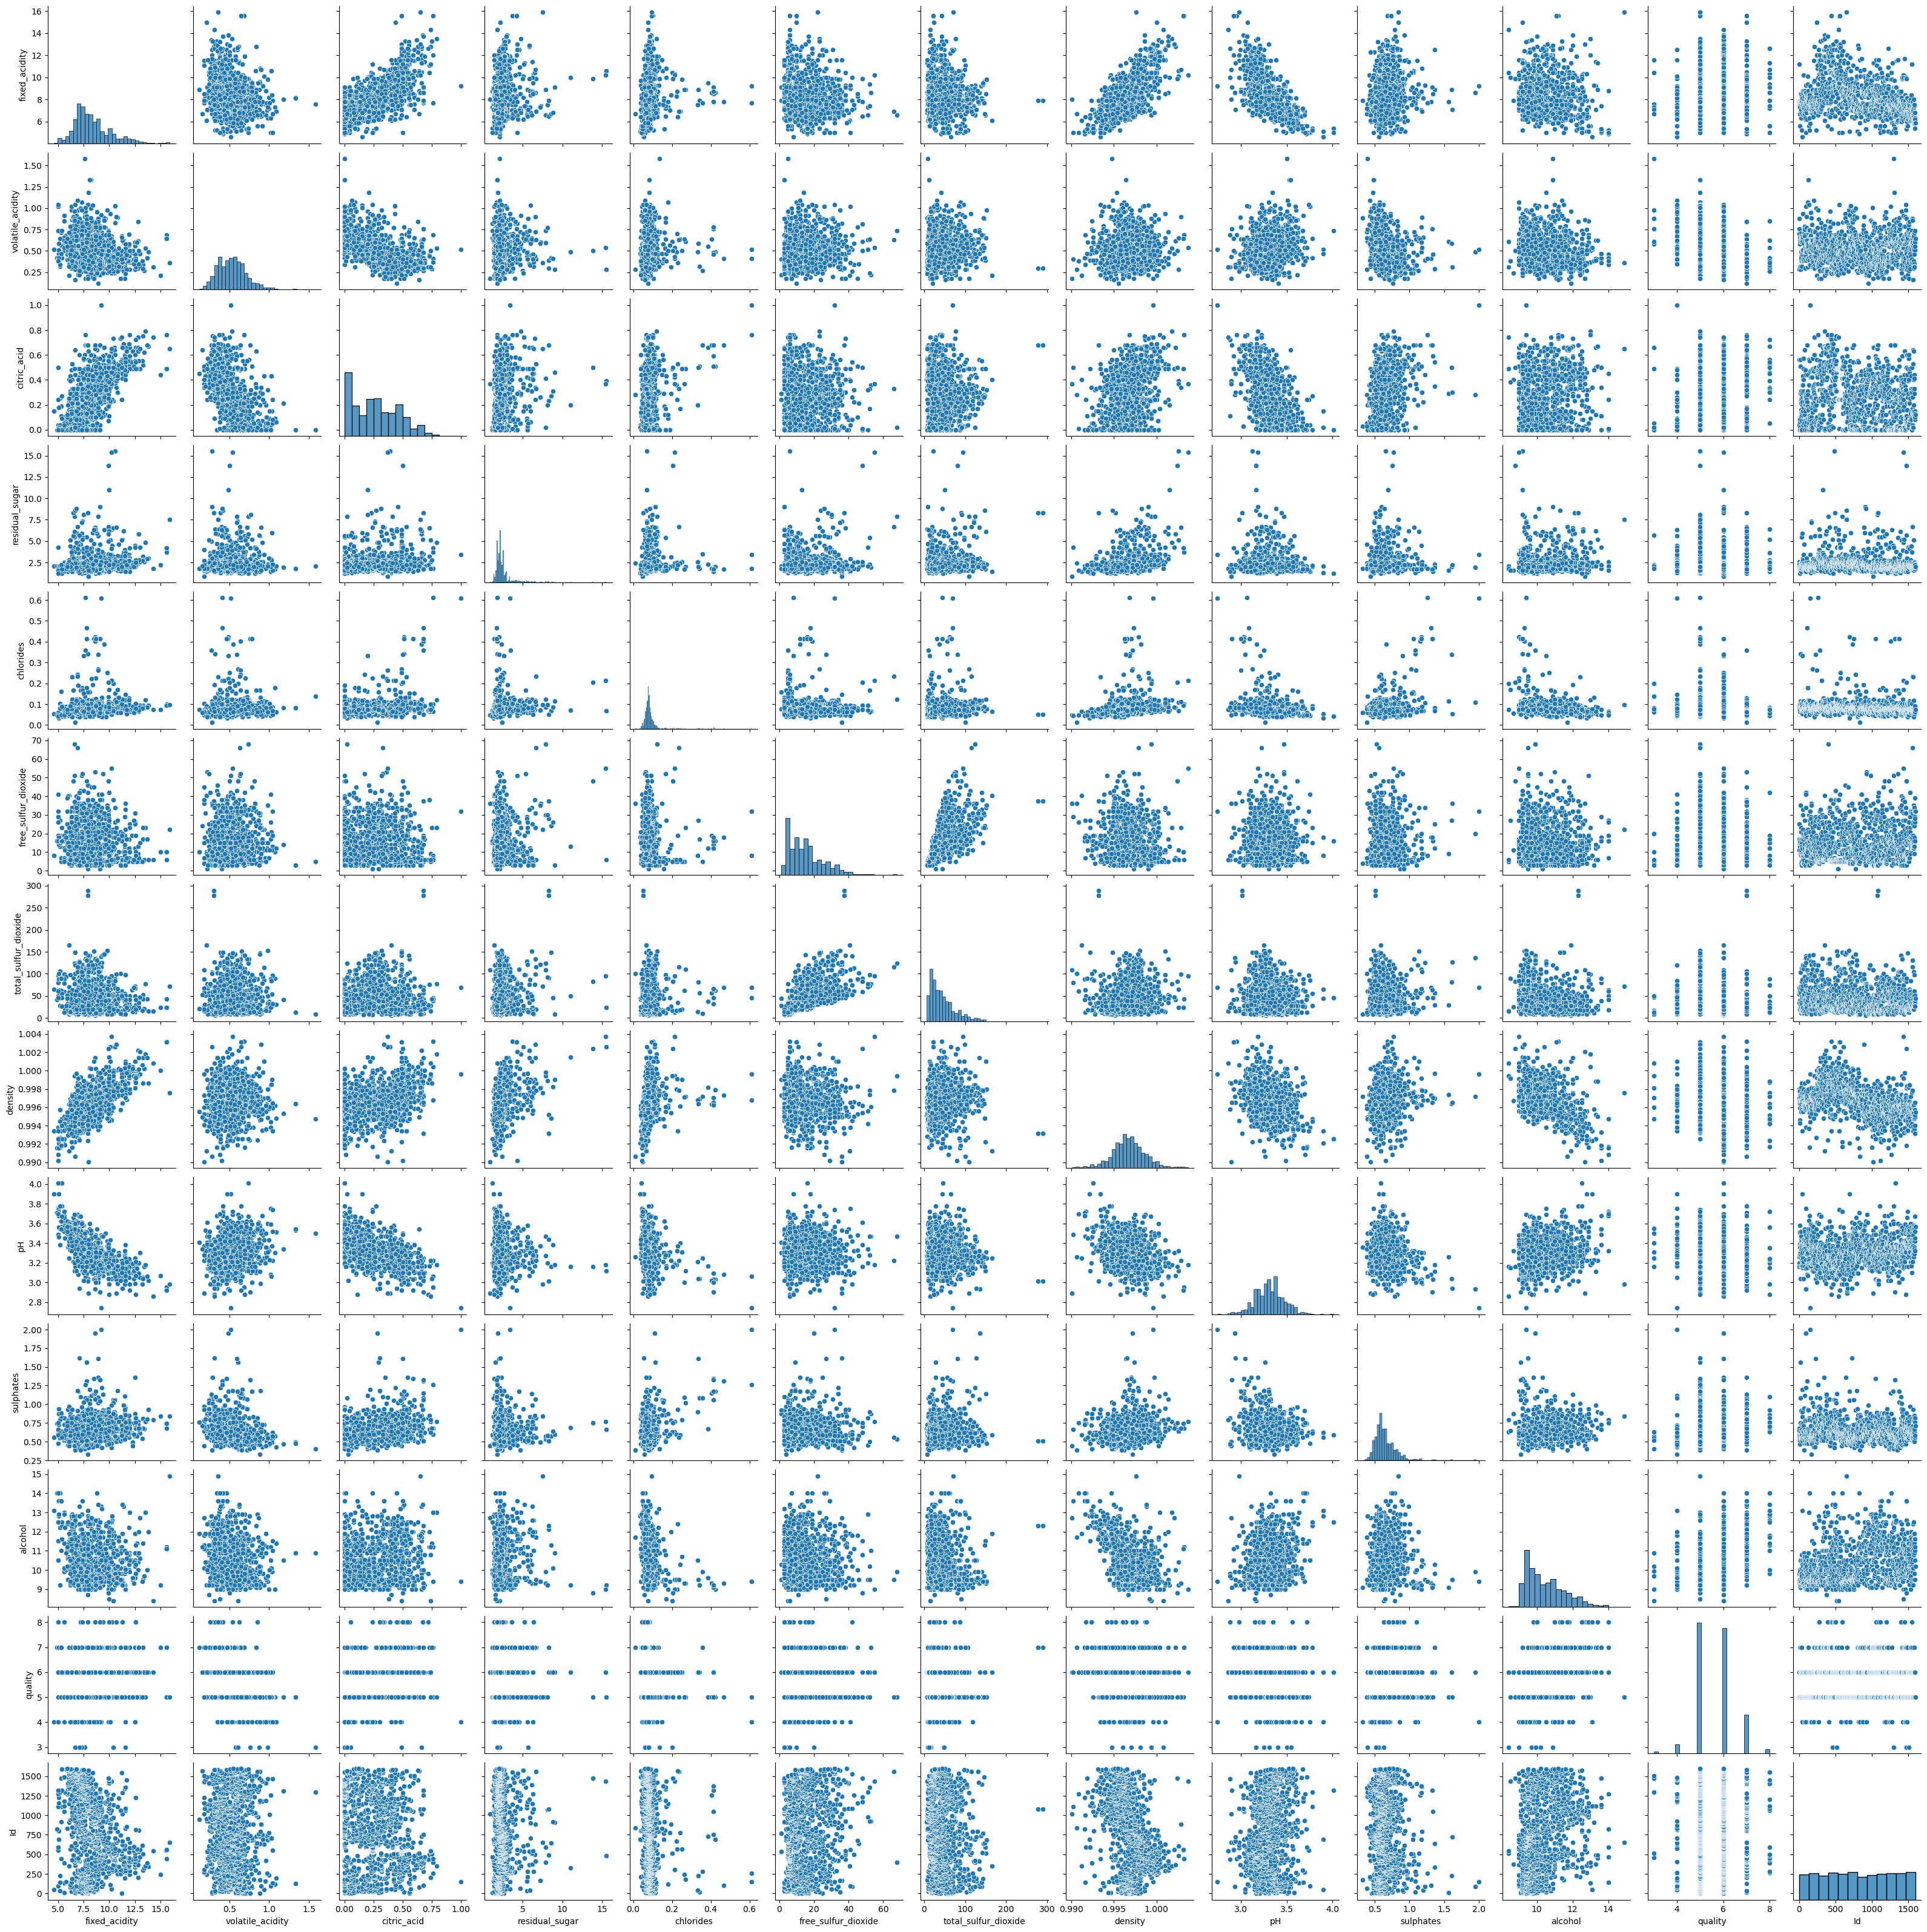

In [47]:
sns.pairplot(df)

In [48]:
df.shape

(1143, 13)

In [49]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [50]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
fixed_acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile_acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric_acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual_sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free_sulfur_dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total_sulfur_dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


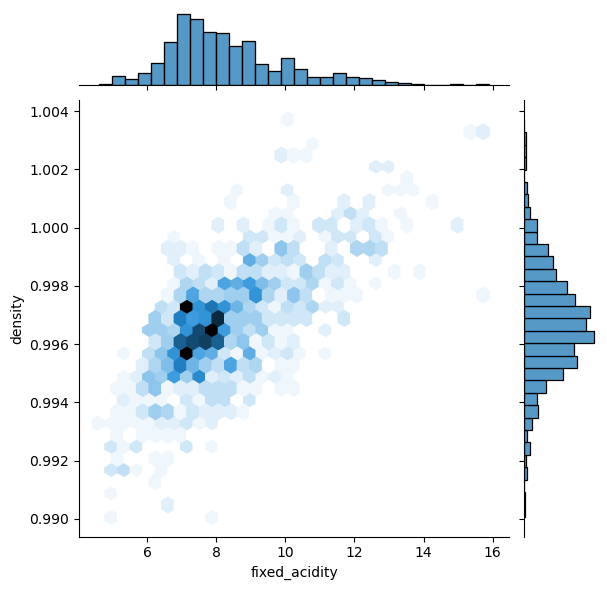

In [51]:
sns.jointplot(x=df['fixed_acidity'],y=df['density'],kind='hex')

In [52]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [53]:
y=df['quality']
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


In [54]:
x=df.drop('quality',axis=1)
print(x)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free_sulfur_dioxide  

In [55]:
x.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,10


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [57]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(914, 12) (914,) (229, 12) (229,)


In [58]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
yhat=dtc.predict(x_test)
yhat

array([5, 6, 6, 5, 6, 7, 5, 5, 6, 5, 7, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 6,
       5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 5, 7, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 5,
       7, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 4, 5,
       6, 6, 4, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5,
       6, 5, 7, 4, 5, 5, 6, 6, 7, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 4, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 5, 7, 5,
       4, 6, 5, 6, 4, 6, 6, 6, 6])

In [60]:
print("Decision Tree's Accuracy:",accuracy_score(y_test,yhat))

Decision Tree's Accuracy: 0.5720524017467249


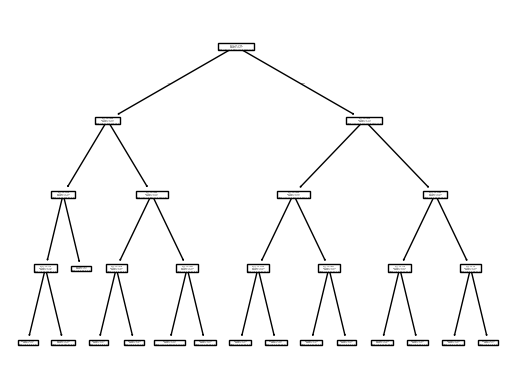

In [61]:
plot_tree(dtc)
plt.show()

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


<Axes: xlabel='volatile_acidity', ylabel='quality'>

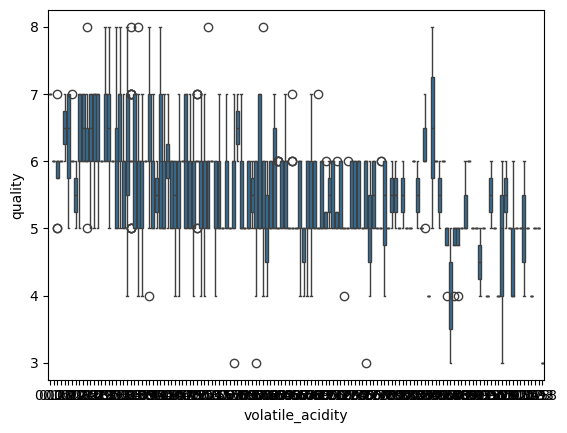

In [64]:
sns.boxplot(x='volatile_acidity',y='quality',data=df)


<Axes: xlabel='citric_acid', ylabel='quality'>

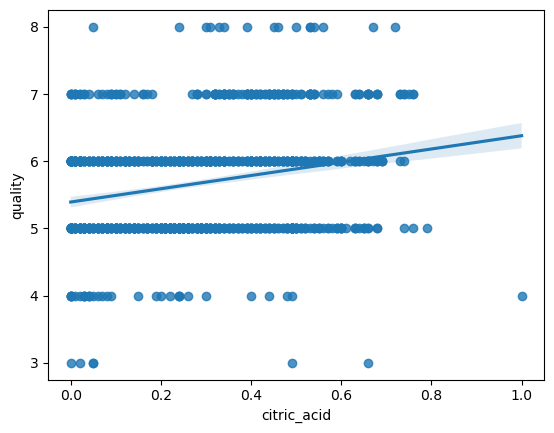

In [65]:
sns.regplot(x='citric_acid',y='quality',data=df)

<Axes: ylabel='quality'>

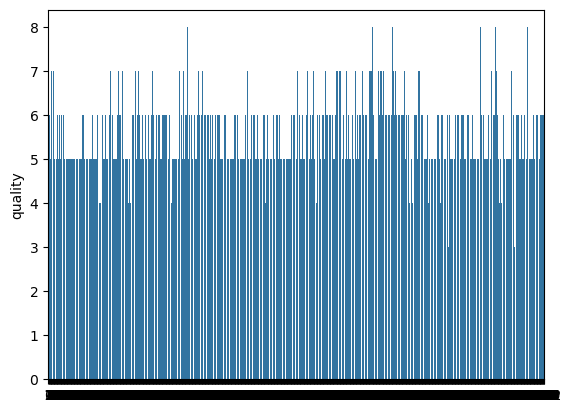

In [66]:
sns.barplot(df['quality'])

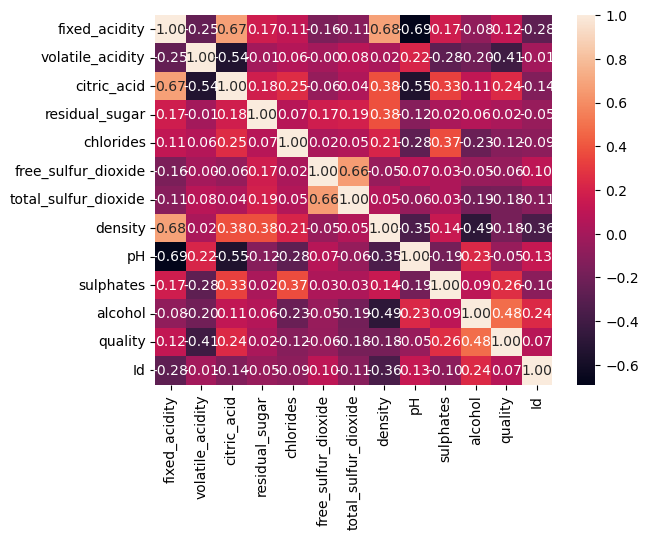

In [67]:
sns.heatmap(round(df.corr(),2),annot=True,fmt='.2f')
plt.show()

In [68]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
fixed_acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile_acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric_acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual_sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free_sulfur_dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total_sulfur_dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


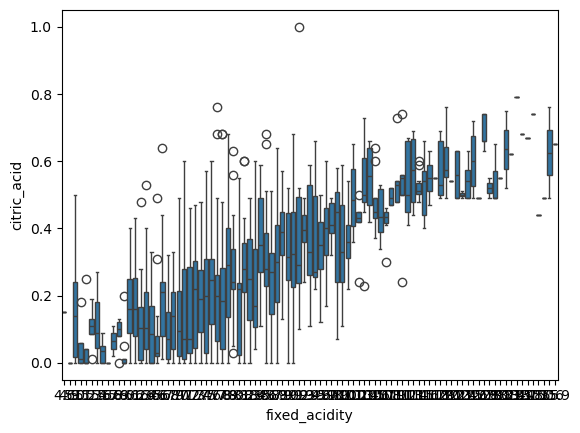

In [69]:
sns.boxplot(x='fixed_acidity',y='citric_acid',data=df)
plt.show()

<Axes: xlabel='citric_acid', ylabel='fixed_acidity'>

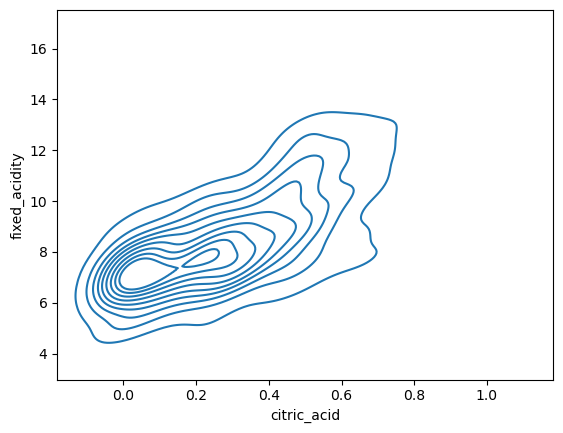

In [70]:
sns.kdeplot(x='citric_acid',y='fixed_acidity',data=df)

In [71]:
acc=accuracy_score(y_test,yhat)
cm=confusion_matrix(y_test,yhat)
cr=classification_report(y_test,yhat)

/home/pandi-kabilesh-p/anaconda3/envs/pandiayyapamuruga/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pandi-kabilesh-p/anaconda3/envs/pandiayyapamuruga/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pandi-kabilesh-p/anaconda3/envs/pandiayyapamuruga/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [72]:
print(acc)
print(cm)
print(cr)

0.5720524017467249
[[ 1  2  3  0  0]
 [ 2 63 30  1  0]
 [ 2 26 63  8  0]
 [ 1  0 21  4  0]
 [ 0  0  0  2  0]]
              precision    recall  f1-score   support

           4       0.17      0.17      0.17         6
           5       0.69      0.66      0.67        96
           6       0.54      0.64      0.58        99
           7       0.27      0.15      0.20        26
           8       0.00      0.00      0.00         2

    accuracy                           0.57       229
   macro avg       0.33      0.32      0.32       229
weighted avg       0.56      0.57      0.56       229



In [74]:
params={'criterion':['gini','entropy'],
        'max_depth':[2,3,4,5,None],
        'min_samples_split':[2,4,5],
        'min_samples_leaf':[1,2,3]}

grid=GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 5]})

In [75]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [77]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
y_pred

array([5, 6, 6, 5, 5, 7, 5, 5, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 5,
       5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 5,
       7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 4, 5,
       6, 6, 4, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5,
       6, 5, 7, 4, 5, 5, 6, 6, 7, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 5, 7, 5,
       4, 6, 5, 6, 6, 6, 6, 6, 6])

In [78]:
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Tuned Accuracy: 0.5502183406113537
Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 2 65 27  2  0]
 [ 2 32 57  8  0]
 [ 0  1 21  4  0]
 [ 0  0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.64      0.68      0.66        96
           6       0.53      0.58      0.55        99
           7       0.25      0.15      0.19        26
           8       0.00      0.00      0.00         2

    accuracy                           0.55       229
   macro avg       0.28      0.28      0.28       229
weighted avg       0.53      0.55      0.54       229



/home/pandi-kabilesh-p/anaconda3/envs/pandiayyapamuruga/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pandi-kabilesh-p/anaconda3/envs/pandiayyapamuruga/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pandi-kabilesh-p/anaconda3/envs/pandiayyapamuruga/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th